In [7]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 200  # number of students

# Generate features
gpa = np.round(np.random.normal(3.0, 0.5, n), 2)
majors = np.random.choice(['CS', 'Math', 'Economics', 'History'], n)
clubs = np.random.poisson(2, n)
attendance = np.random.uniform(50, 100, n)

# Dropout logic: low GPA & low attendance
dropout_prob = (gpa < 2.5) & (attendance < 70)
dropout = np.where(dropout_prob, 1, 0)

# Create DataFrame
df = pd.DataFrame({
    'GPA': gpa,
    'Major': majors,
    'Clubs': clubs,
    'Attendance': np.round(attendance, 1),
    'Dropout': dropout
})

print(df.head())

# Save to CSV for later use
df.to_csv("students.csv", index=False)

    GPA    Major  Clubs  Attendance  Dropout
0  3.25     Math      4        82.6        0
1  2.93     Math      0        91.5        0
2  3.32       CS      0        60.3        0
3  3.76  History      0        50.5        0
4  2.88       CS      0        56.8        0


In [39]:
# Dropout rate per major
dropout_rate_per_major = df.groupby('Major')['Dropout'].mean()
print(dropout_rate_per_major)

Major
CS           0.040816
Economics    0.125000
History      0.089286
Math         0.054545
Name: Dropout, dtype: float64


In [6]:
pip install pandas numpy

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.0 MB 7.9 MB/s eta 0:00:02
   ------------------------ --------------- 6.8/11.0 MB 18.3 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 19.9 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   --------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
print(df.describe())

              GPA       Clubs  Attendance     Dropout
count  200.000000  200.000000  200.000000  200.000000
mean     2.979850    1.890000   75.700500    0.075000
std      0.465502    1.399174   14.900418    0.264052
min      1.690000    0.000000   50.500000    0.000000
25%      2.647500    1.000000   61.850000    0.000000
50%      2.995000    2.000000   76.150000    0.000000
75%      3.252500    3.000000   89.075000    0.000000
max      4.360000    8.000000   99.900000    1.000000


In [19]:
print(df['Dropout'].value_counts())

Dropout
0    185
1     15
Name: count, dtype: int64


In [26]:
df.groupby('Major')['GPA'].mean()

Major
CS           2.988571
Economics    2.943500
History      2.954464
Math         3.024364
Name: GPA, dtype: float64

In [25]:
high_risk = df[
    (df['GPA'] < 2.5) & (df['Attendance'] < 70 )]
print(high_risk.head())

     GPA      Major  Clubs  Attendance  Dropout
13  2.04       Math      3        69.2        1
16  2.49         CS      4        58.3        1
23  2.29    History      1        67.8        1
33  2.47  Economics      1        63.1        1
35  2.39  Economics      0        52.6        1


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# Load dataset
df = pd.read_csv("students.csv")

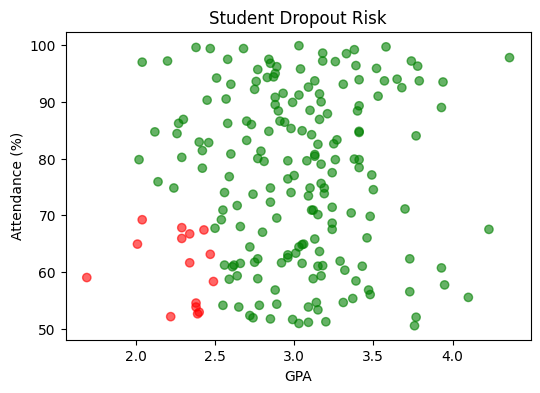

In [29]:
# Map dropout status to colors
colors = df['Dropout'].map({0: 'green', 1: 'red'})

# Scatter plot
plt.figure(figsize=(6,4))
plt.scatter(df['GPA'], df['Attendance'], c=colors, alpha=0.6)
plt.xlabel("GPA")
plt.ylabel("Attendance (%)")
plt.title("Student Dropout Risk")
plt.show()

In [38]:
high_risk = df[
    (df['GPA'] < 2.5) & (df['Attendance'] < 70 )]
print(high_risk.head())

     GPA      Major  Clubs  Attendance  Dropout
13  2.04       Math      3        69.2        1
16  2.49         CS      4        58.3        1
23  2.29    History      1        67.8        1
33  2.47  Economics      1        63.1        1
35  2.39  Economics      0        52.6        1


In [40]:
# Dropout rate per major
dropout_rate_per_major = df.groupby('Major')['Dropout'].mean()
print(dropout_rate_per_major)

Major
CS           0.040816
Economics    0.125000
History      0.089286
Math         0.054545
Name: Dropout, dtype: float64


In [41]:
# Compare summary statistics for dropouts vs non-dropouts
summary_stats = df.groupby('Dropout').describe()
print(summary_stats)

           GPA                                                      Clubs  \
         count      mean       std   min    25%   50%    75%   max  count   
Dropout                                                                     
0        185.0  3.036811  0.432886  2.02  2.750  3.05  3.290  4.36  185.0   
1         15.0  2.277333  0.213591  1.69  2.255  2.34  2.395  2.49   15.0   

                   ...           Attendance                              \
             mean  ...  75%  max      count       mean        std   min   
Dropout            ...                                                    
0        1.935135  ...  3.0  8.0      185.0  76.920541  14.736999  50.5   
1        1.333333  ...  2.0  4.0       15.0  60.653333   6.267133  52.1   

                                  
           25%   50%   75%   max  
Dropout                           
0        63.00  79.0  90.0  99.9  
1        54.15  61.6  66.3  69.2  

[2 rows x 24 columns]


In [42]:
# Compare summary statistics for dropouts vs non-dropouts within each major
summary_stats_by_major = df.groupby(['Major', 'Dropout']).describe()
print(summary_stats_by_major)

                    GPA                                                   \
                  count      mean       std   min     25%    50%     75%   
Major     Dropout                                                          
CS        0        47.0  3.012979  0.419181  2.20  2.7350  3.010  3.1950   
          1         2.0  2.415000  0.106066  2.34  2.3775  2.415  2.4525   
Economics 0        35.0  3.022286  0.367952  2.14  2.7950  3.040  3.2550   
          1         5.0  2.392000  0.067231  2.29  2.3800  2.390  2.4300   
History   0        51.0  3.036471  0.444737  2.24  2.7000  3.060  3.2600   
          1         5.0  2.118000  0.275445  1.69  2.0100  2.220  2.2900   
Math      0        52.0  3.068462  0.481380  2.02  2.7475  3.100  3.3950   
          1         3.0  2.260000  0.192873  2.04  2.1900  2.340  2.3700   

                        Clubs            ...           Attendance             \
                    max count      mean  ...  75%  max      count       mean   
Maj

In [43]:
# Check if any students with clubs > 0 dropped out
print(df[df['Clubs'] > 0]['Dropout'].value_counts())

Dropout
0    157
1     12
Name: count, dtype: int64


Correlation matrix:
                  GPA     Clubs  Attendance   Dropout
GPA         1.000000  0.022658    0.072508 -0.430808
Clubs       0.022658  1.000000    0.109745 -0.113572
Attendance  0.072508  0.109745    1.000000 -0.288273
Dropout    -0.430808 -0.113572   -0.288273  1.000000


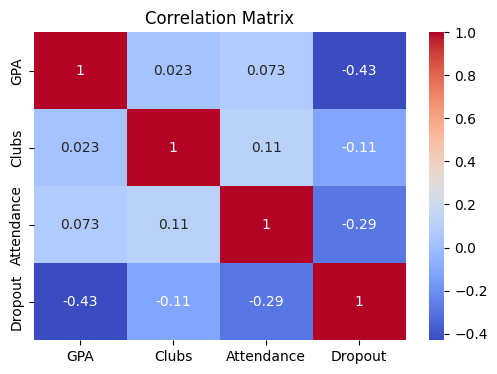

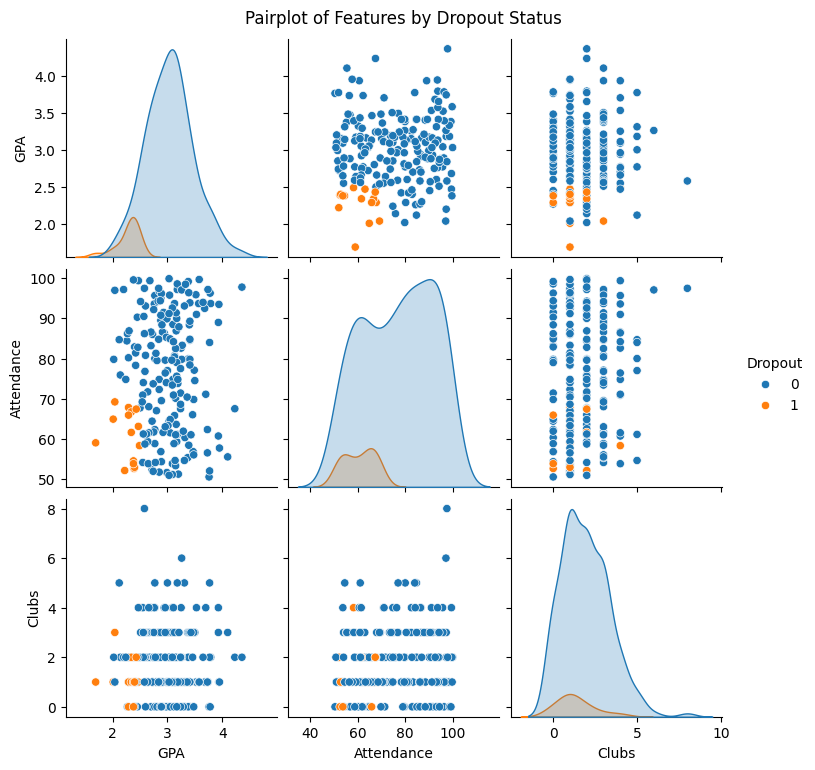

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric variables
corr = df.corr(numeric_only=True)
print("Correlation matrix:\n", corr)

# Visualize correlations with a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot to visualize relationships, colored by Dropout
sns.pairplot(df, hue="Dropout", vars=["GPA", "Attendance", "Clubs"])
plt.suptitle("Pairplot of Features by Dropout Status", y=1.02)
plt.show()

In [45]:
pip install seaborn matplotlib  

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
# Mean values of each variable for dropouts vs non-dropouts
print(df.groupby('Dropout')[['GPA', 'Attendance', 'Clubs']].mean())

              GPA  Attendance     Clubs
Dropout                                
0        3.036811   76.920541  1.935135
1        2.277333   60.653333  1.333333


In [48]:
# Crosstab of Major and Dropout
print(pd.crosstab(df['Major'], df['Dropout']))

Dropout     0  1
Major           
CS         47  2
Economics  35  5
History    51  5
Math       52  3


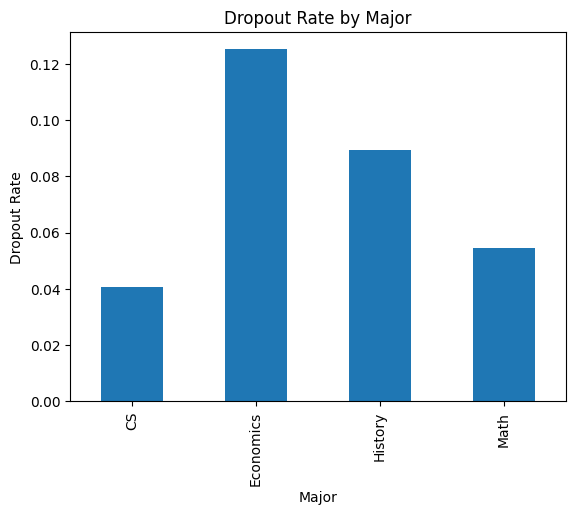

In [49]:
import matplotlib.pyplot as plt

# Bar plot of dropout rate by major
df.groupby('Major')['Dropout'].mean().plot(kind='bar')
plt.ylabel('Dropout Rate')
plt.title('Dropout Rate by Major')
plt.show()